This code allows you to estimate:
The Intersection density INDEX at the DESTINATION for only one destination point or for a set of destinations. All the intersections related to each destination are assumed to be previously estimated.

All the following Python libraries must be previously installed in your Python.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import geopandas as gpd
import csv

# Destination's intersection density INDEX 

### Example for ONLY one route

The data is taken from a shape already including the points within a 600m buffer associated to destination of the route.

In [2]:
route = 1002
db = gpd.read_file('../Shapes/end_intersections600/R' +"%s" % (route) +'_end_intersections600.shp')
print (db.crs)
db.head()

{u'lon_0': -74.07750791666666, u'k': 1, u'ellps': u'GRS80', u'y_0': 1000000, u'no_defs': True, u'proj': u'tmerc', u'x_0': 1000000, u'units': u'm', u'lat_0': 4.596200416666666}


,Heri,ID_node,Intersec,Traf_light,X_coor,Y_coor,Z,geometry,highway,osmid,ruta
0,0,521.0,1,0,834049.399966,1.182685e+06,1488.055195,POINT (834049.3999663252 1182684.599320794),None,323855444,None
1,0,522.0,1,0,834034.525077,1.182690e+06,1481.919184,POINT (834034.5250773293 1182689.664085552),None,323855751,None
2,0,12860.0,1,0,833941.494114,1.181765e+06,1515.464907,POINT (833941.4941137605 1181765.342646964),None,1816091548,None
3,0,2331.0,1,0,834182.978776,1.182687e+06,1487.879357,POINT (834182.9787760896 1182686.973625985),None,339049941,None
4,0,2332.0,1,0,834208.951785,1.182657e+06,1492.796992,POINT (834208.9517848332 1182656.732154537),None,339049944,None


In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 11 columns):
Heri          209 non-null int64
ID_node       209 non-null float64
Intersec      209 non-null int64
Traf_light    209 non-null int64
X_coor        209 non-null float64
Y_coor        209 non-null float64
Z             209 non-null float64
geometry      209 non-null object
highway       21 non-null object
osmid         209 non-null object
ruta          0 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 18.0+ KB


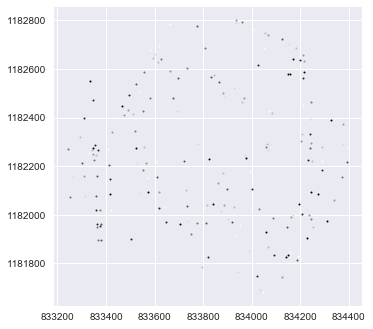

In [4]:
db.plot()

In [5]:
#number or intersections
ni = len(db)
#Buffer radio
radio = 0.6
#Buffer area 
area = 3.14159265358979 * radio**2
#Intersection index
intindex = ni / area
print (ni)
print (area)
print (intindex)

209
1.13097335529
184.796572812


In [6]:
results = pd.DataFrame ({
        "ruta": [str(route)],
        "D_intindex": [intindex]})
print (results)

   D_intindex  ruta
0  184.796573  1002


### Intersection density estimated for ALL destinations

The code requires the list of the origin points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [2]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

The results are kept in the folder called "OUT" which is included in the Tables folder. Each resulting file is related to each destination. If you modify the structure of these folders, please modify the code.   

In [8]:
for i in routes:
    db = gpd.read_file('../Shapes/end_intersections600/R' +"%s" % (i) +'_end_intersections600.shp')
    #number or intersections
    ni = len(db)
    #Buffer radio
    radio = 0.6
    #Buffer area 
    area = 3.14159265358979 * radio**2
    #Intersection index
    intindex = ni / area
    #Saving results in a Dataframe and exporting to csv file
    results = pd.DataFrame ({
        "route": [str(route)],
        "intindex": [intindex]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_end_intersections600.txt',index=False, header=True)

### Destinations' Intersenction density Repport 

This part of the code summarizes the intersection index related to each destination in only one table. Please copy it to a text file and save. 

In [9]:
#rutas = np.loadtxt('../datos/tables/IN/rutas.txt',dtype='str')
print 'ruta,D_intindex'
for i in rutas:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(i)+'_end_intersections600.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[0]))

ruta,D_intindex
('1002', 184.79657281199999)
('1006', 178.607213914)
('1009', 122.902983832)
('1013', 47.746482927599999)
('10291', 161.80752547700001)
('10292', 124.671372089)
('1050', 141.471060526)
('1052', 190.101737582)
('1079', 186.56496106899999)
('1099', 119.366207319)
('1100', 197.17529060800001)
('1101', 197.17529060800001)
('1102', 170.64946676)
('1104', 220.16433794400001)
('1124', 183.912378684)
('1128', 183.912378684)
('1132', 136.165895756)
('1134', 170.64946676)
('1137', 184.79657281199999)
('11391140', 184.79657281199999)
('1147', 198.94367886500001)
('1151', 201.59626125)
('1381', 160.923331348)
('1392', 262.60565610200001)
('1397', 111.408460164)
('1398', 212.20659078899999)
('1399', 174.186243273)
('1401', 154.73397245000001)
('1404', 170.64946676)
('1408', 262.60565610200001)
('1409', 170.64946676)
('1413', 255.53210307500001)
('1415', 275.86856802599999)
('1419', 148.54461355199999)
('1421', 177.72301978600001)
('1423', 170.64946676)
('2001', 244.037579408)
('2019